# 1. Análise descritiva dos dados
Após copiar o arquivo, vamos carregar as bibliotecas base para fazer a análise descritiva

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import regex as re
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import random
import os


def descritiva_tabela(data_frame_selec):
    df2 = data_frame_selec.describe(include = 'all')
    df2.loc['dtype'] = data_frame_selec.dtypes
    df2.loc['size'] = len(data_frame_selec)
    df2.loc['% count'] = data_frame_selec.isnull().mean()
    return pd.DataFrame(df2.transpose())

Verificando missings, quantidades e quantis

In [2]:
os.chdir('D:\\Users\\krums\\Documents\\MBA FIAP IA\Bootcamp IA & Machine Learning')
df_creditos = pd.read_csv('Dados\\solicitacoescredito.csv')


In [3]:
df_creditos.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


In [4]:
descritiva_tabela(df_creditos)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,size,% count
numero_solicitacao,8973.0,NaN,NaN,NaN,4550.042015,2603.485853,1.0,2316.0,4559.0,6802.0,9045.0,int64,8973,0.0
razaoSocial,8973,2759,Malcolm Bolton,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,8973,0.0
nomeFantasia,8973,2677,Nathan Jones,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,8973,0.0
cnpjSemTraco,8973,2829,AVAO63044598911311,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,8973,0.0
maiorAtraso,8973.0,NaN,NaN,NaN,24.642594,66.180793,0.0,3.0,6.0,22.0,1265.0,int64,8973,0.0
margemBrutaAcumulada,8973.0,NaN,NaN,NaN,0.362176,0.201455,0.0,0.281395,0.402895,0.50786,1.0,float64,8973,0.0
percentualProtestos,7475.0,NaN,NaN,NaN,0.01926,0.593579,0.0,0.0,0.0,0.0,36.983728,float64,8973,0.166945
primeiraCompra,8867,1950,2012-12-21T00:00:00,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,8973,0.011813
prazoMedioRecebimentoVendas,8973.0,NaN,NaN,NaN,23.083027,68.177649,0.0,0.0,0.0,30.0,1605.0,int64,8973,0.0
titulosEmAberto,8973.0,NaN,NaN,NaN,64871.00633,248285.153353,0.0,0.0,0.0,17250.0,3938589.7,float64,8973,0.0


### 1.1 Analisando e filtrando de casos inconsistentes
Para a amostra, temos que verificar:
1. Casos de clientes que tem mais de um nome de `razaoSocial`
2. Casos com solicitação de valor zero

In [5]:
df_creditos.loc[df_creditos['valorSolicitado']<=0.0]   

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista


In [6]:
df_creditos_count_razao = df_creditos.groupby('cnpjSemTraco')['razaoSocial'].nunique().reset_index().rename(columns={'razaoSocial':'qtde_razaoSocial'})

In [7]:
df_creditos_count_razao

,cnpjSemTraco,qtde_razaoSocial
0,AADG56617962174727,1
1,AADW74046123201866,1
2,AAKI68017899673695,1
3,AAMI69895399119182,1
4,AANH69260102434077,1
...,...,...
2824,ZYRG46055383402143,1
2825,ZYTZ74379794301453,1
2826,ZYUL32892423767231,1
2827,ZZSR33059911878058,1


In [8]:
#8 solicitações provenientes de clientes com mais de uma razão social
df_creditos.merge(df_creditos_count_razao[df_creditos_count_razao['qtde_razaoSocial']>1],on=['cnpjSemTraco'],how='inner')

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista,qtde_razaoSocial
0,955,Mrs. Rosemary Fleming,Dr. Josephine Scott,OIOX50590478841783,0,0.000000,NaN,2019-07-10T14:56:04,0,0.0,...,0.0,2010.0,De 6 a 10 anos,93700.0,False,True,0.0,196653.0,2020-03-09T11:11:25,2
1,2453,Mrs. Rosemary Fleming,Dr. Josephine Scott,OIOX50590478841783,0,0.000000,NaN,2019-07-10T14:56:04,0,0.0,...,0.0,2010.0,De 6 a 10 anos,93700.0,False,True,0.0,196653.0,2020-05-29T18:55:51,2
2,4013,Ms. Jasmine Clark,Jeffrey Fisher,OIOX50590478841783,0,0.416005,0.0,2018-12-06T00:00:00,0,0.0,...,5301457.0,2016.0,De 0 a 5 anos,93700.0,False,True,1.0,169974.0,2020-08-11T20:01:06,2
3,2379,Samuel Ryan,Rosie Andrews-Richards,YZJZ74754922350776,0,0.423515,0.0,2020-04-24T00:00:00,0,0.0,...,1736000.0,1996.0,Acima de 17 anos,3500000.0,False,False,1.0,127853.0,NaN,2
4,2408,Stacey Taylor,Carly Hamilton,YZJZ74754922350776,0,0.000000,0.0,2020-05-28T03:00:00,0,0.0,...,1736000.0,1996.0,Acima de 17 anos,3500000.0,False,False,0.0,127853.0,NaN,2
5,2410,Samuel Ryan,Rosie Andrews-Richards,YZJZ74754922350776,0,0.423515,0.0,2020-04-24T00:00:00,0,0.0,...,1736000.0,1996.0,Acima de 17 anos,3500000.0,False,False,1.0,127853.0,NaN,2
6,4251,Janice Evans-Patel,Rita O'Neill,THNJ64645145337093,0,0.000000,0.0,0001-01-01T03:06:00,0,0.0,...,163508171.0,1973.0,Acima de 17 anos,0.0,False,False,0.0,7468254.0,2020-08-20T12:23:15,2
7,8958,Jane Knight,Ross Noble-Coates,THNJ64645145337093,0,0.000000,0.0,2021-02-24T03:00:00,0,0.0,...,74361203.0,1973.0,Acima de 17 anos,1156103.0,True,False,0.0,10082143.0,2021-02-24T17:38:55,2


In [9]:
df_creditos = df_creditos.merge(df_creditos_count_razao[df_creditos_count_razao['qtde_razaoSocial']==1],on=['cnpjSemTraco'],how='inner')

Cirando o dataset para clientes

No caso temos que pegar as features dos clientes que resumem cada um deles. Podemos pegar as features em função to tempo (agregando variaveis por solicitação para cada cliente), porém testaremos a clusterização sem usar a variação temporal ainda. Se isso já ajudar a descrever é um bom progresso:

In [10]:
#features calculadas (em função do tempo)
#buscando a linha índice de solicitação

df_clientes_aux = df_creditos.groupby(df_creditos['cnpjSemTraco'])['numero_solicitacao'].min().reset_index().rename(columns={'numero_solicitacao':'min_solicitacao'})

In [11]:
df_clientes = df_creditos.merge(df_clientes_aux,left_on=['cnpjSemTraco','numero_solicitacao'], right_on=['cnpjSemTraco','min_solicitacao'],how='inner').copy()

Devemos selecionar as variáveis que maximizam o tamanho da amostra. para isso, olhamos todas as variáveis pertinentes aos clientes e verificamos quanto de missing temos. O conjunto de colunas deve ter o menor % de missings possivel.

In [12]:
df1 = descritiva_tabela(df_clientes)
df1.filter(['cnpjSemTraco','maiorAtraso'
            ,'margemBrutaAcumulada','percentualProtestos','primeiraCompra'
            ,'faturamentoBruto','margemBruta','periodoDemonstrativoEmMeses','custos'
            ,'anoFundacao','capitalSocial','restricoes','empresa_MeEppMei'
            ,'scorePontualidade'],axis=0)['% count'].max()

0.2208067940552017

In [13]:
df_clientes = df_clientes.filter(['cnpjSemTraco','maiorAtraso'
                                 ,'margemBrutaAcumulada','percentualProtestos','primeiraCompra'
                                 ,'faturamentoBruto','margemBruta','periodoDemonstrativoEmMeses','custos'
                                 ,'anoFundacao','capitalSocial','restricoes','empresa_MeEppMei'
                                 ,'scorePontualidade'],axis=1)

Agora temos que fazer um hot encode de algumas variáveis:

1. tirar todos os nulos de variáveis de cliente;
2. Podemos usar como default da `primeiraCompra` pra quem não tem como sendo uma data 1900-01-01;
3. `restricoes` deve ser tratada com hot encode;

In [14]:
descritiva_tabela(df_clientes)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtype,size,% count
cnpjSemTraco,2826,2826,KEBE17609492220843,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2826,0.0
maiorAtraso,2826.0,NaN,NaN,NaN,19.61465,61.723435,0.0,0.0,4.0,17.0,1265.0,int64,2826,0.0
margemBrutaAcumulada,2826.0,NaN,NaN,NaN,0.330253,0.219489,0.0,0.122448,0.37544,0.496265,1.0,float64,2826,0.0
percentualProtestos,2202.0,NaN,NaN,NaN,0.031435,0.871212,0.0,0.0,0.0,0.0,36.983728,float64,2826,0.220807
primeiraCompra,2749,1948,2021-01-19T00:00:00,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object,2826,0.027247
faturamentoBruto,2633.0,NaN,NaN,NaN,35221709.997721,208041981.414704,0.0,771058.0,2576271.0,8581828.0,4464000000.0,float64,2826,0.068294
margemBruta,2633.0,NaN,NaN,NaN,8254899.803266,59114384.397134,-10215304.0,0.0,0.0,846544.0,1373143082.0,float64,2826,0.068294
periodoDemonstrativoEmMeses,2633.0,NaN,NaN,NaN,10.317129,3.403478,1.0,12.0,12.0,12.0,12.0,float64,2826,0.068294
custos,2633.0,NaN,NaN,NaN,13611760.81466,108083525.820899,-346633805.0,0.0,0.0,781891.0,2958235000.0,float64,2826,0.068294
anoFundacao,2633.0,NaN,NaN,NaN,2005.457653,23.02854,1000.0,2000.0,2009.0,2015.0,2020.0,float64,2826,0.068294


In [15]:
#1.
df_clientes['primeiraCompra'].fillna('1900-01-01 00:00:00', inplace=True)
df_clientes['primeiraCompra'] = df_clientes['primeiraCompra'].apply(lambda x:re.sub('T',' ',x))
#Garantindo que teremos valores de data decentes:
df_clientes.loc[df_clientes['primeiraCompra']<='1900-01-01 00:00:00',['primeiraCompra']]='1900-01-01 00:00:00'
df_clientes['primeiraCompra'] = pd.to_datetime(df_clientes['primeiraCompra'], format='%Y-%m-%d %H:%M:%S')

#2.
df_clientes['restricoes'] = df_clientes['restricoes']*1
df_clientes['restricoes'] = df_clientes['restricoes'].apply(float)
df_clientes['empresa_MeEppMei'] = df_clientes['empresa_MeEppMei']*1
df_clientes['empresa_MeEppMei'] = df_clientes['empresa_MeEppMei'].apply(float)
df_clientes['maiorAtraso'] = df_clientes['maiorAtraso'].apply(float)

#3. 
df_clientes.dropna(inplace=True)
df_clientes.reset_index(inplace=True)

In [16]:
#a clusterização deve ter variáveis em função das características do cliente, ou seja:
X = df_clientes.filter(['margemBrutaAcumulada','percentualProtestos','empresa_MeEppMei'
                        ,'faturamentoBruto','margemBruta','periodoDemonstrativoEmMeses','custos'
                        ,'anoFundacao','capitalSocial','restricoes','scorePontualidade']
,axis=1).copy()

Utilizando KMEANS e GAussian Mixture Models (GMM). Podemos comparar as dias técnias, sendo uma mais simples e outra mais voltada a estimação de densidade, e tentar interpretar qual possui maior variância entre grupos. O que tiver maior variância entre grupos e características mais distintas podemos selecionar como melhor clusterização. Após isso podemos usar um classificador (SVM ou KNN), para encontrar quem está em cada grupo.

In [17]:
X_scale=pd.DataFrame(scale(X),columns=X.columns.values)
random.seed(1994)

In [18]:
kmeans = KMeans(4, random_state=0)
labels_KMEANS = kmeans.fit(X_scale).predict(X_scale)

In [19]:
gmm = GaussianMixture(n_components=4).fit(X_scale)
labels_GMM = gmm.predict(X_scale)

Visualizando os casos com componentes principais e validando se as variáveis explicam bem a variabilidade total dos casos.

In [20]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X),)

Verificando o % de explicação por componente principal

In [21]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)  

array([24.32, 35.72, 45.87, 55.22, 64.26, 72.84, 80.83, 87.82, 94.41,
       97.4 , 99.99])

In [22]:
df_comp = pd.DataFrame(X_reduced,columns=['PC'+str(num_c) for num_c in range(0,pca.n_components_)])
df_comp['labels_KMEANS']=labels_KMEANS
df_comp['labels_GMM']=labels_GMM
X['labels_KMEANS']=labels_KMEANS
X['labels_GMM']=labels_GMM
df_comp.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,labels_KMEANS,labels_GMM
0,-0.424057,0.810613,-0.812782,-0.231588,0.245868,0.115557,0.925583,-0.110459,0.791023,-0.032665,-0.021058,1,0
1,-0.542991,-1.085728,-0.535502,0.464208,-1.048253,0.861088,0.434278,0.240261,-0.654512,0.084668,0.070496,1,0
2,1.001880,-0.602236,0.405266,-0.254675,0.089102,0.419409,-0.505476,-0.620649,-0.005051,-0.363640,-0.862647,0,1
3,-0.067266,-0.019043,0.741443,-0.259711,0.193476,0.273053,-0.454689,-0.464892,0.569851,-0.011801,-0.144539,0,1
4,-0.206987,0.610063,0.442426,-0.593760,0.830461,-0.203892,-0.401415,-0.398600,0.943827,0.649386,-0.351081,0,2


Verificando as quantidades de individuos por grupo, cruzando cada técnica:

In [23]:
df_comp.groupby(['labels_KMEANS','labels_GMM'])['PC0'].count()

labels_KMEANS  labels_GMM
0              1             969
               2              52
               3               1
1              0             847
2              2               9
3              2              76
               3             110
Name: PC0, dtype: int64

Visualizando com componentes principais

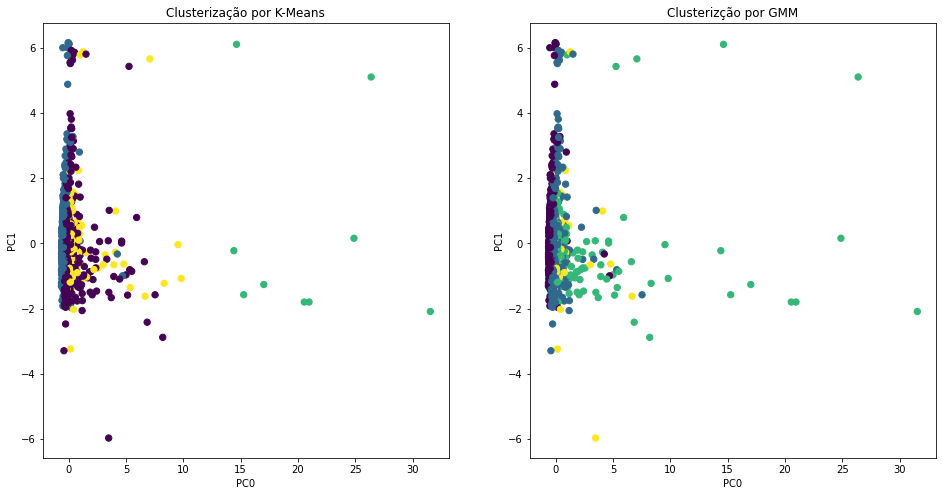

In [24]:
from turtle import title

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))

ax1.scatter(df_comp['PC0'], df_comp['PC1'], c=df_comp['labels_KMEANS'], s=40, cmap='viridis')
ax1.set_title('Clusterização por K-Means')
ax2.scatter(df_comp['PC0'], df_comp['PC1'], c=df_comp['labels_GMM'], s=40, cmap='viridis')
ax2.set_title('Clusterizção por GMM')

for ax in fig.axes:
    ax.set_xlabel('PC0')
    ax.set_ylabel('PC1')

Visualizando por cada variável

Primeiramente por KMEANS

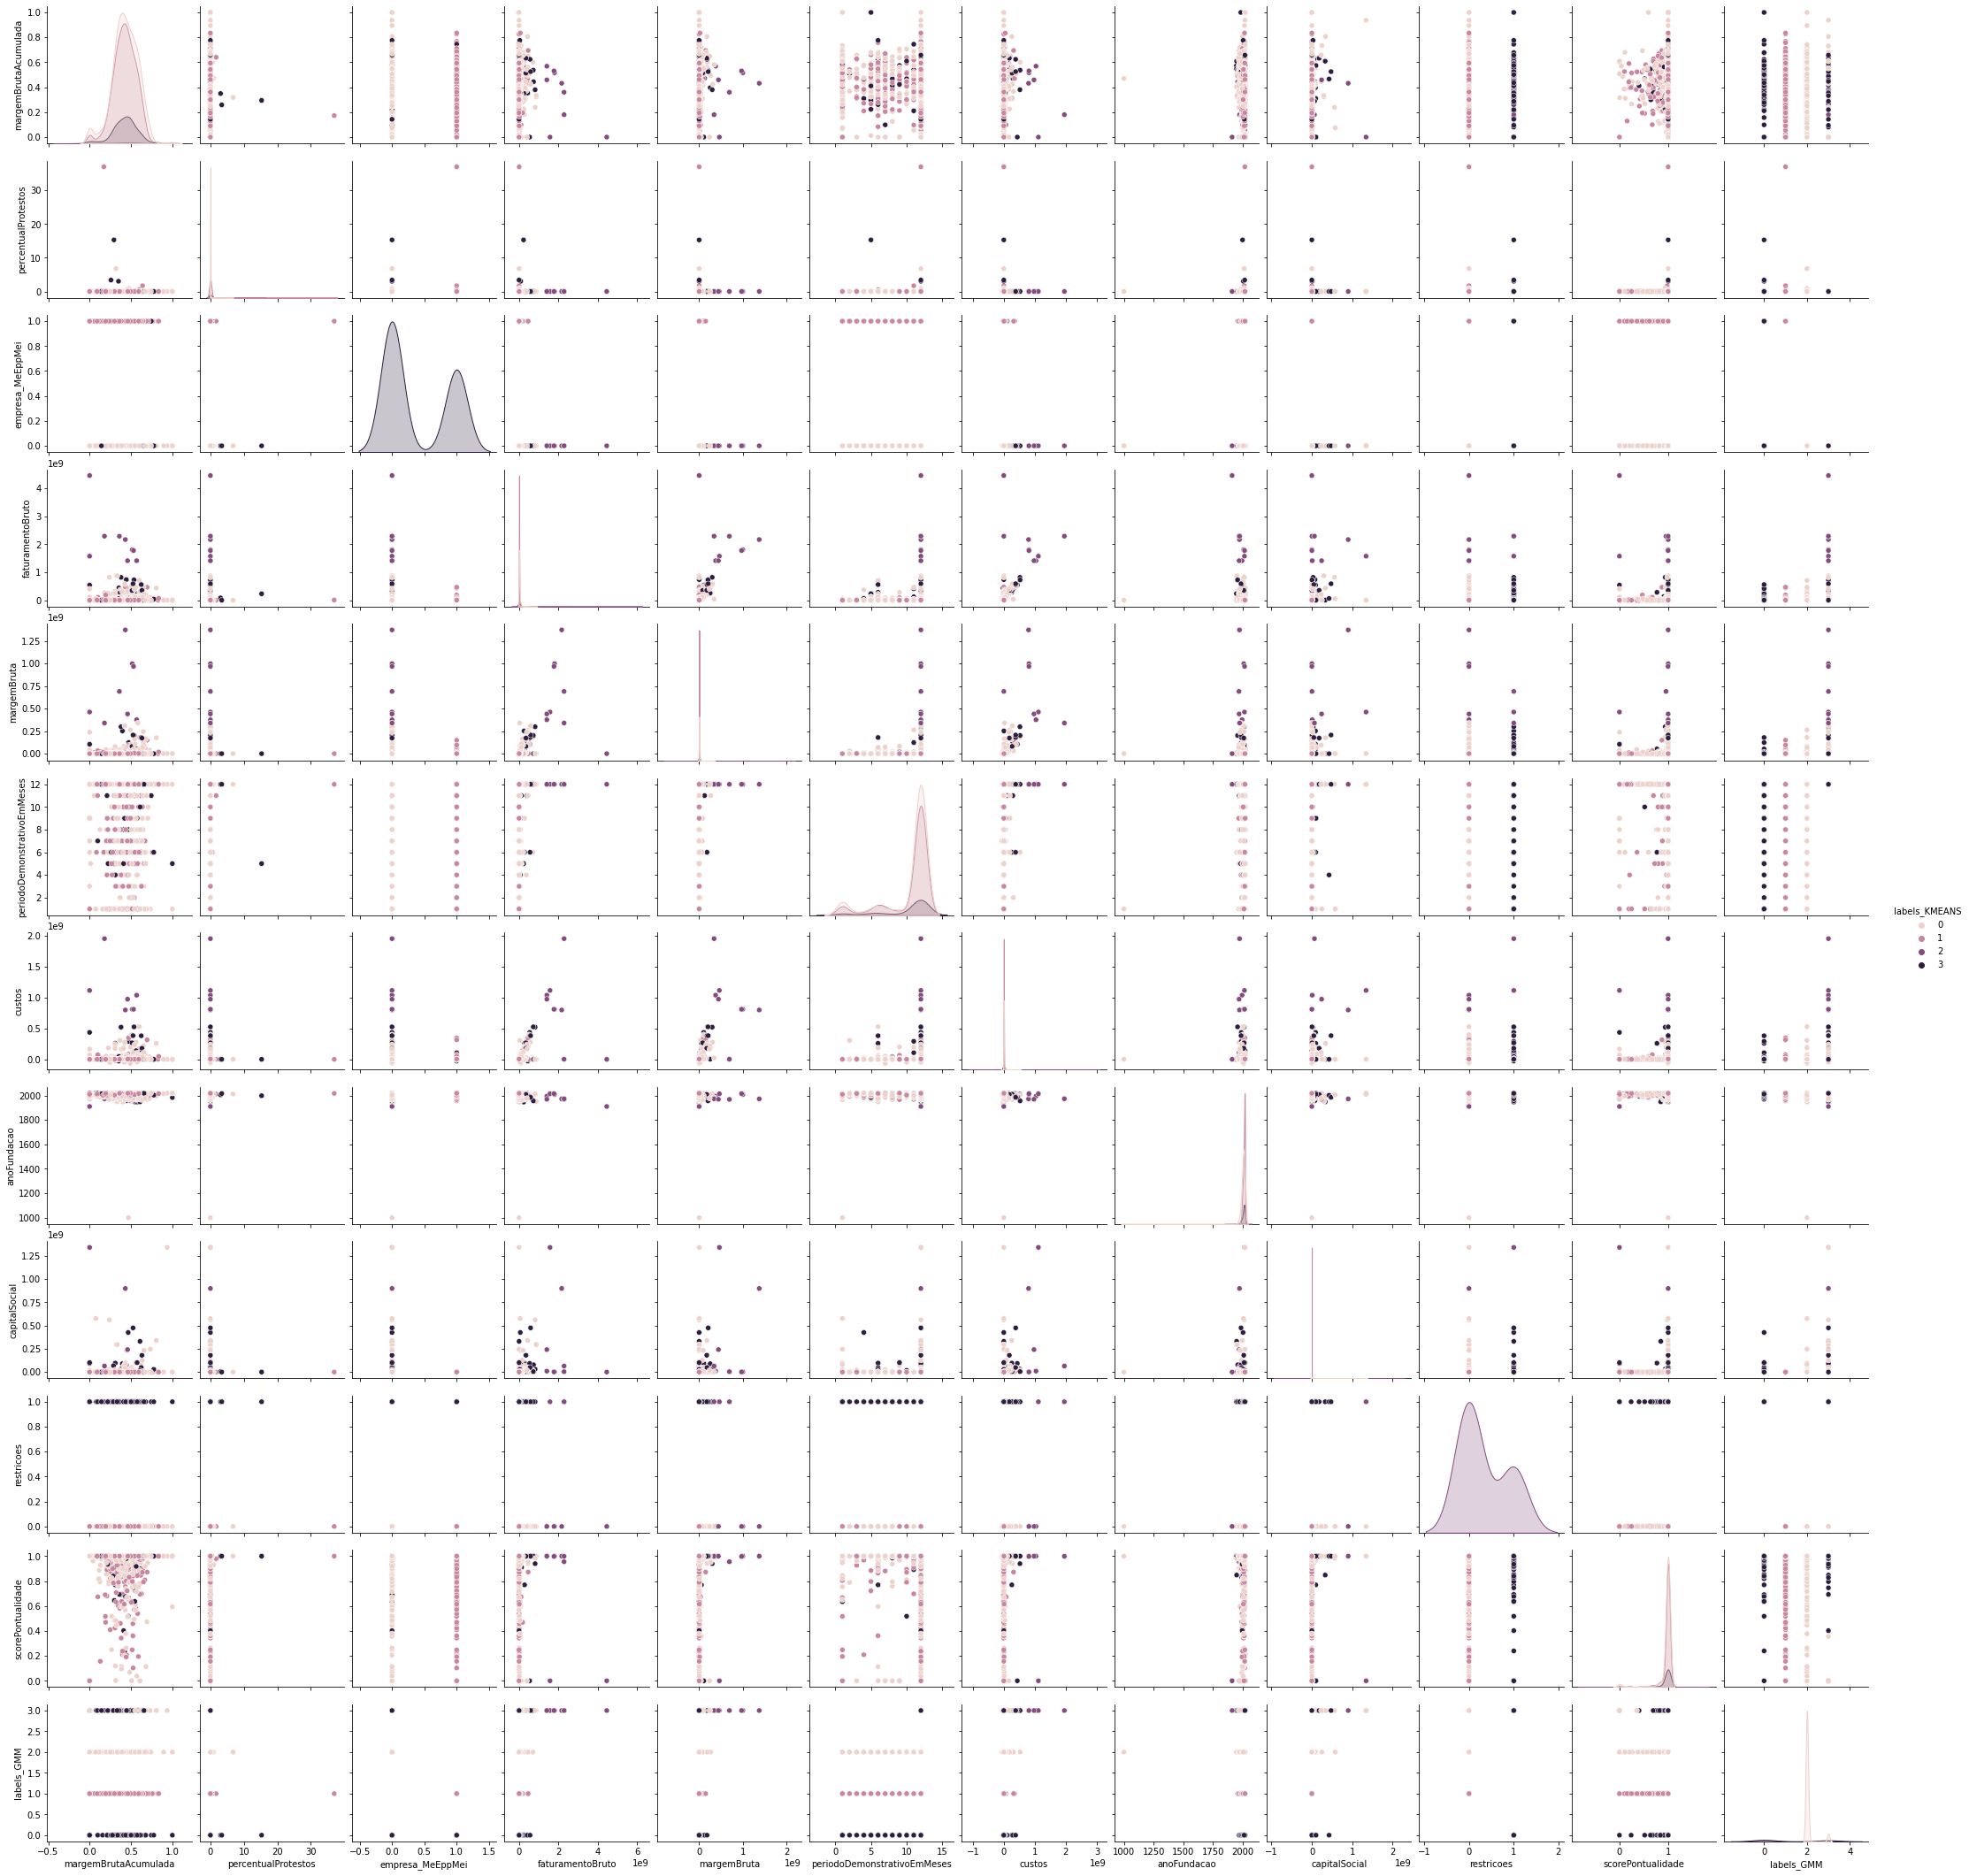

In [25]:
sns.pairplot(X, hue="labels_KMEANS")

Por GMM

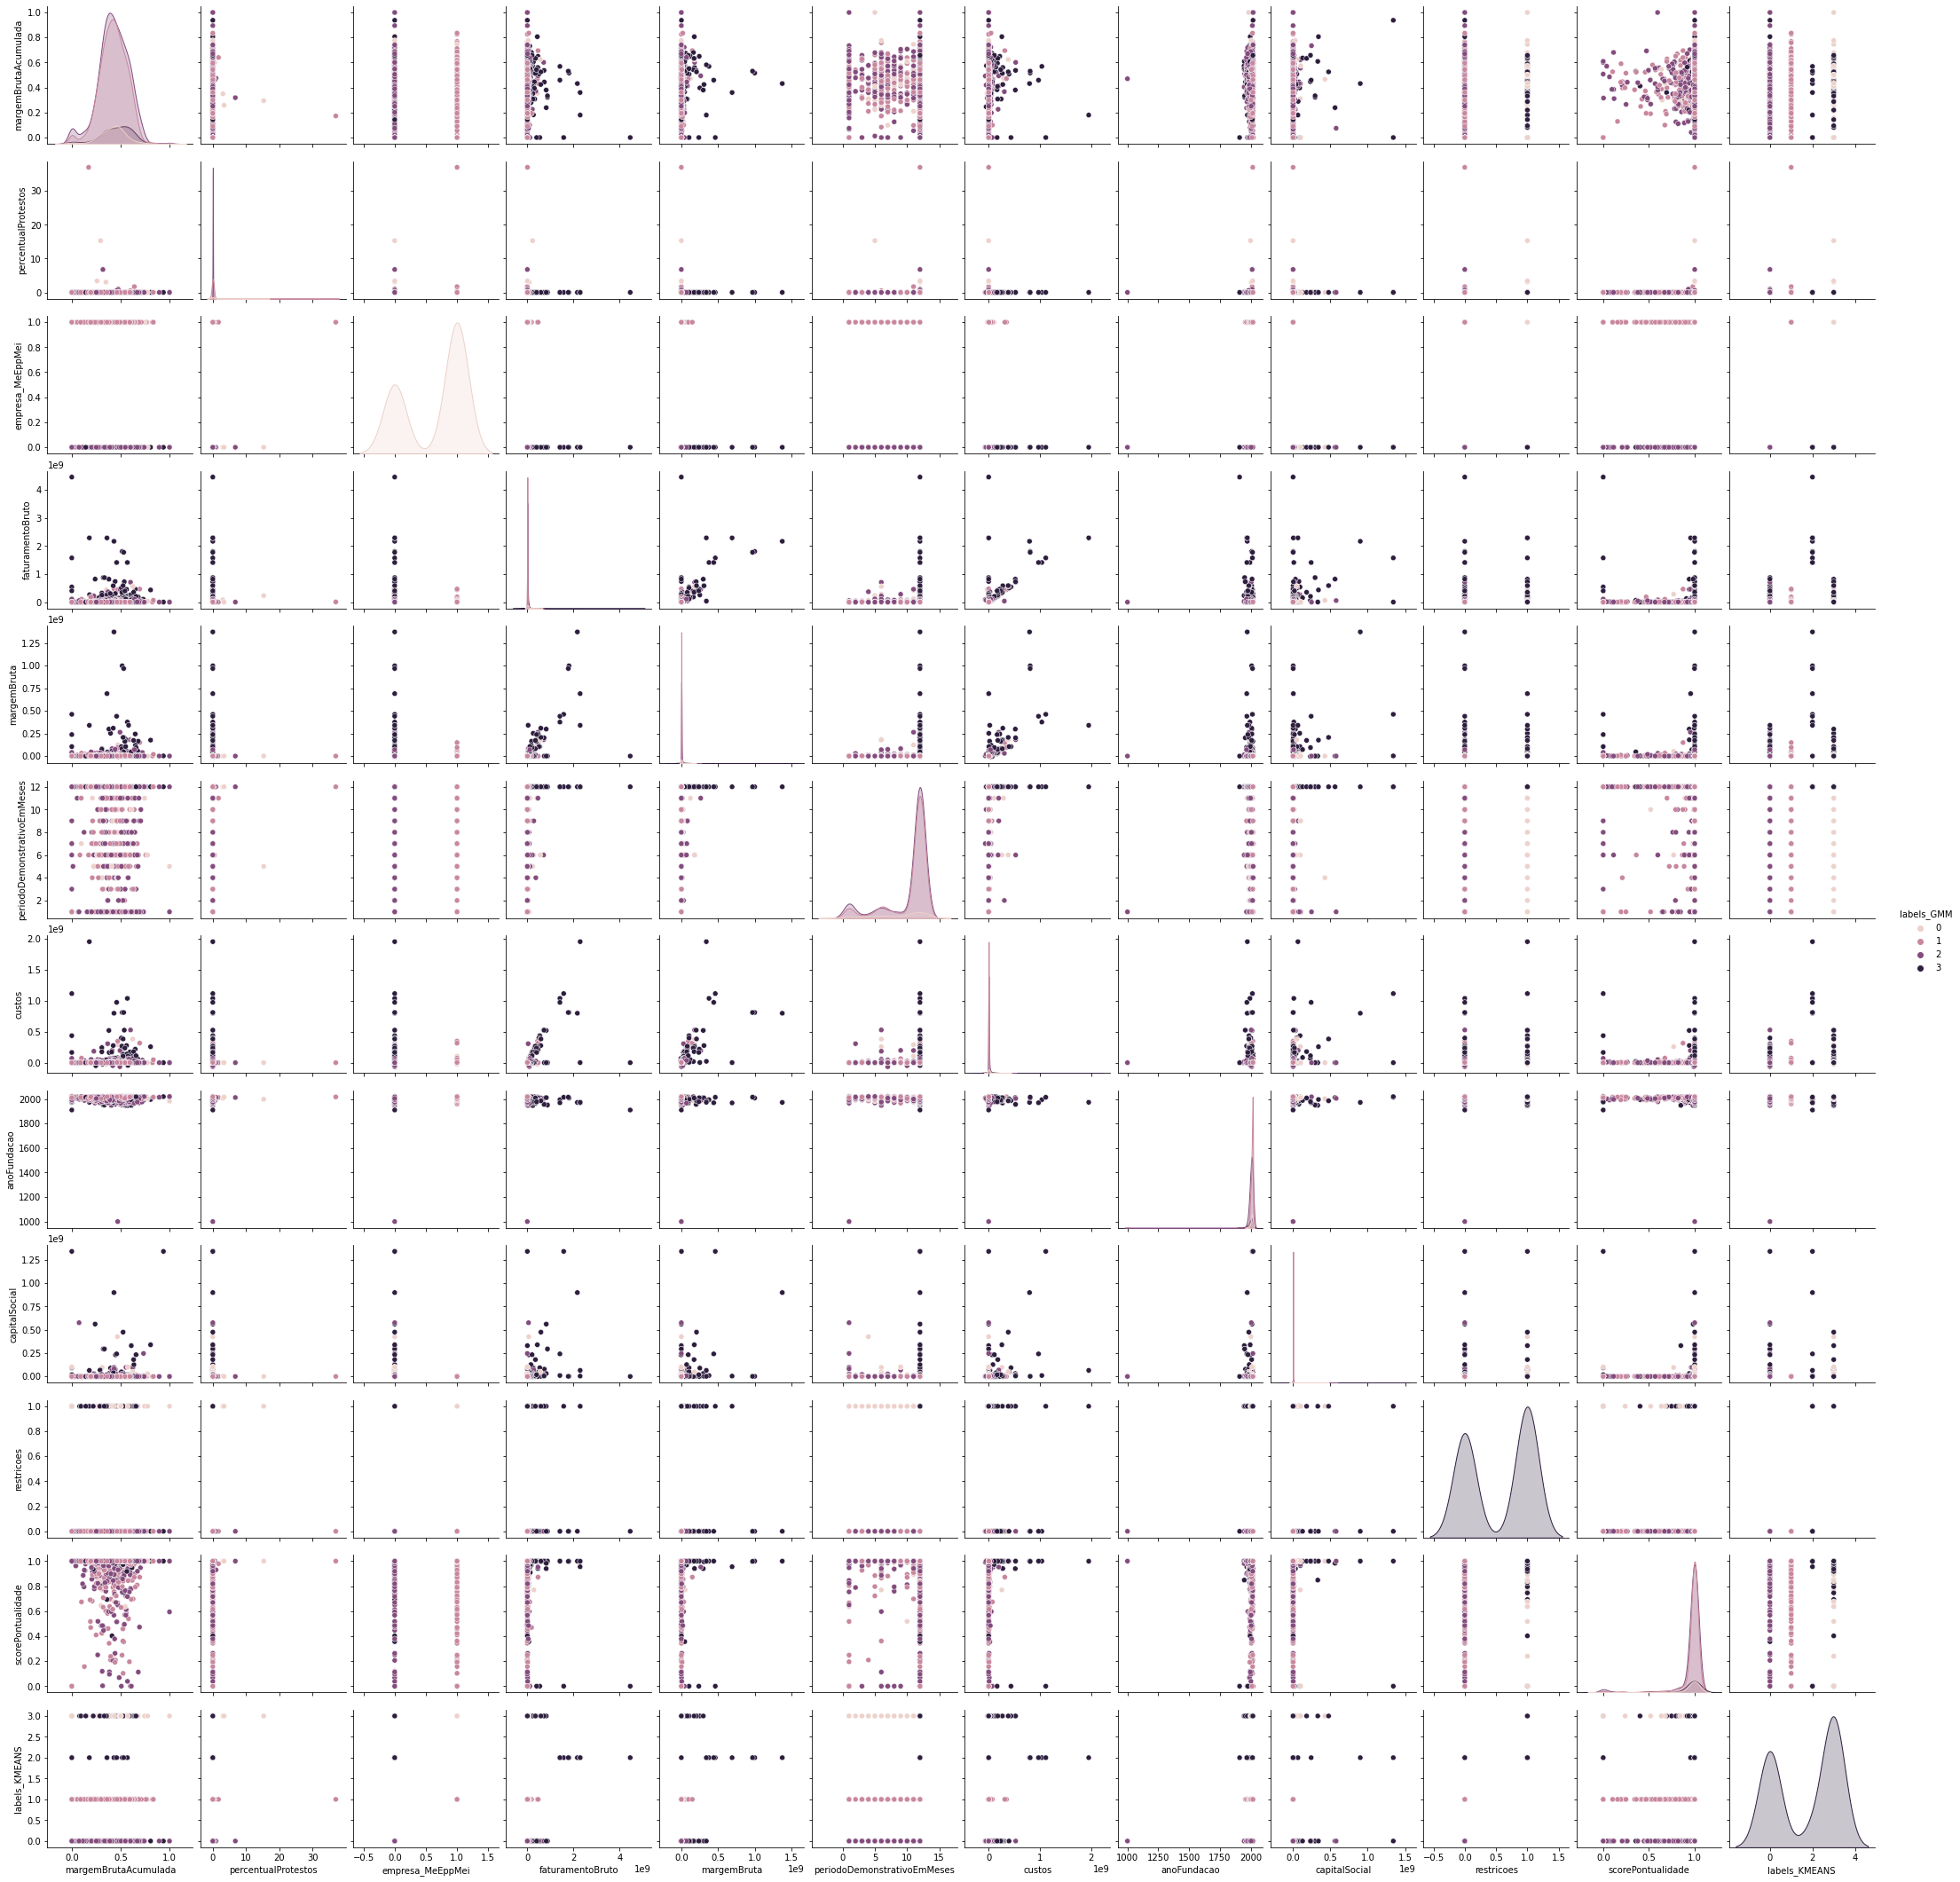

In [26]:
sns.pairplot(X, hue="labels_GMM")

Verificando métricas entre grupos, e também a variancia entre grupos:

In [25]:
from scipy.spatial import distance
matrix_dist = distance.cdist(X, X, 'euclidean')


In [26]:
pd_distancias = pd.DataFrame(matrix_dist,columns=X.index.values)
pd_distancias = pd_distancias.stack()
pd_distancias.name = 'distancia'
pd_distancias = pd_distancias.reset_index()

In [27]:
X_labels = X[['labels_KMEANS','labels_GMM']]
X_labels['index_chave'] = X_labels.index.values
X_labels_1 = X_labels.rename({'labels_KMEANS':'labels_KMEANS_1','labels_GMM':'labels_GMM_1','index_chave':'index_chave'},axis='columns').copy()
X_labels_2 = X_labels.rename({'labels_KMEANS':'labels_KMEANS_2','labels_GMM':'labels_GMM_2','index_chave':'index_chave'},axis='columns').copy()
pd_distancias = pd_distancias.merge(X_labels_1,left_on='level_0',right_on='index_chave',how='inner')
pd_distancias = pd_distancias.merge(X_labels_2,left_on='level_1',right_on='index_chave',how='inner')
dist_entre_GMM = pd_distancias[pd_distancias['labels_KMEANS_2']!=pd_distancias['labels_KMEANS_1']]['distancia'].sum()
dist_entre_KMEANS=pd_distancias[pd_distancias['labels_GMM_2']!=pd_distancias['labels_GMM_1']]['distancia'].sum()

C:\Users\krums\AppData\Local\Temp\ipykernel_7996\1860384929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_labels['index_chave'] = X_labels.index.values


In [28]:
razao_vars = dist_entre_KMEANS/dist_entre_GMM
if razao_vars>1:
    resp = 'maior'
else:
    resp='menor'

In [36]:
print('A distancia entre grupos de KMEANS é {razao_vars}% {resp} do que o agrupamento por GMM'.format(razao_vars=round(abs(1-razao_vars),2)*100, resp=resp))

A distancia entre grupos de KMEANS é 12.0% maior do que o agrupamento por GMM


# 3. Modelagem para análise de crédito
Para o modelo de análise de credito, podemos dividir em:

- Modelos conforme score
- Modelo para primeira compra
- Modelo para clientes recorrentes